In [1]:
# %load fuquan_v2.py
## this cell get the data in the certain time range we are interest
#  a simple trate strategy
import os
import pandas as pd
from package_path_define.path_define import *
from package_readdata.read_data import find_stocks_in_date_range_fuquan
from package_readdata.read_data import read_vol_price_data_fuquan
from package_plot.plot_data import *
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
import math
import numpy as np
#-- plot module
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
import matplotlib.pyplot as plt
#print path_fuquan
market='shenzhen'
year1=2016
year2=2017
path1='\\'.join([path_fuquan,market])
sto1=os.listdir(path1)
sto2='000898'
#sto2=sto1[10]
#print sto1
stock_full_path='\\'.join([path1,sto2])
print stock_full_path
files=os.listdir(stock_full_path)
file_num_in=find_stocks_in_date_range_fuquan(stock_full_path,year1,year2) #--- find the stock files in the year range we give


def data_get(stock_full_path,files,file_num_in):
    df_m1 = pd.DataFrame() ## create a blank dataframe
    for num_in in file_num_in:
        file_in='\\'.join([stock_full_path,files[num_in]])
        #print file_in
        df1=read_vol_price_data_fuquan(file_in)
        df_m1=df_m1.append(df1,ignore_index=False)
        #print df1.head()
        #print len(df1)
    date1=df_m1.date.values
    years=[]
    months=[]
    for da in date1:
        year=da[0:4]
        month=da[5:7]
        years.append(int(year))
        months.append(int(month))
    df_m1['year']=years
    df_m1['month']=months
    return df_m1
data_df1=data_get(stock_full_path,files,file_num_in)
print data_df1.head()
data_df1= data_df1.reset_index(drop=True)  #---- reset the index from 0

# In[104]:







the path define is in G:\stock\code\package_path_define
G:\\stock\\data\\fuquan\shenzhen\000898
          date    open    high   close    low      volume  trade_amount  \
58  2016-01-04   9.963  10.252   9.488  9.198  29993684.0   145222400.0   
57  2016-01-05   9.260  10.108   9.984  9.074  37829396.0   178779728.0   
56  2016-01-06   9.963  10.914  10.728  9.901  91265984.0   466255232.0   
55  2016-01-07  10.418  10.562   9.674  9.653  21116904.0   103315088.0   
54  2016-01-08  10.128  10.645  10.645  9.777  76004624.0   385577408.0   

    fuquan_factor  year  month  
58          2.067  2016      1  
57          2.067  2016      1  
56          2.067  2016      1  
55          2.067  2016      1  
54          2.067  2016      1  


In [ ]:
# ----- volume mean, std
# print data_df1.head()
# print data_df1.volume.mean()
# print data_df1.volume.std()

#-----volume > 800000000
#df3=data_df1[data_df1.volume>80000000]


In [115]:
volume_increase=1.5
log_volume_increase=np.log(volume_increase)
# print log_volume_increase
days_delay=2

a2=data_df1.volume[:-days_delay]
a1=data_df1.volume[days_delay:]
log_vol_diff=np.log(a1.values/a2.values)
idx=log_vol_diff>log_volume_increase
#print idx
# idx1=data_df1.index.tolist()
idx_true=np.where(idx==True)
idx1=idx_true[0]
idx_in=[i+days_delay for i in idx1]
# print n1
df3=data_df1.iloc[idx_in]
df4=data_df1.iloc[idx1]
#print df3
# print len(df3)
# print df3

#print idx 
# print data_df1.iloc[idx]
# print data_df1.head()

#a1/a2
# print a1[0]

#df3=data_df1[data_df1.volume>80000000]

# print df3

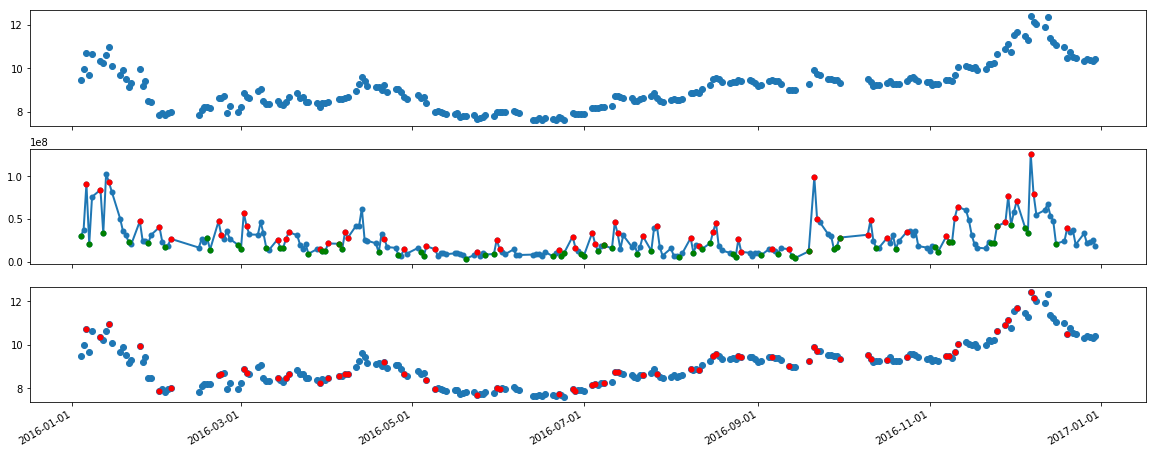

In [116]:

dates=data_df1.date.values
date1=df3.date.values
date2=df4.date.values

#print dates
# plt.figure(21)

fig=plt.figure(figsize=(20, 8))
ax1=fig.add_subplot(311)
# fig, ax = plt.subplots(figsize=(20, 8))
ax1.plot_date(dates, data_df1.close,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
           
ax2=fig.add_subplot(312)
# fig, ax = plt.subplots(212,figsize=(20, 8))
ax2.plot_date(dates, data_df1.volume,'.-',linewidth=2,mew=3)
ax2.plot_date(date1, df3.volume,'.',color='red',mew=3)
ax2.plot_date(date2, df4.volume,'.',color='green',mew=3)
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()   


ax3=fig.add_subplot(313)
ax3.plot_date(dates, data_df1.close,linewidth=2)
ax3.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax3.plot_date(date1, df3.close,'.',color='red',mew=3)
ax3.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()   
        
plt.show()


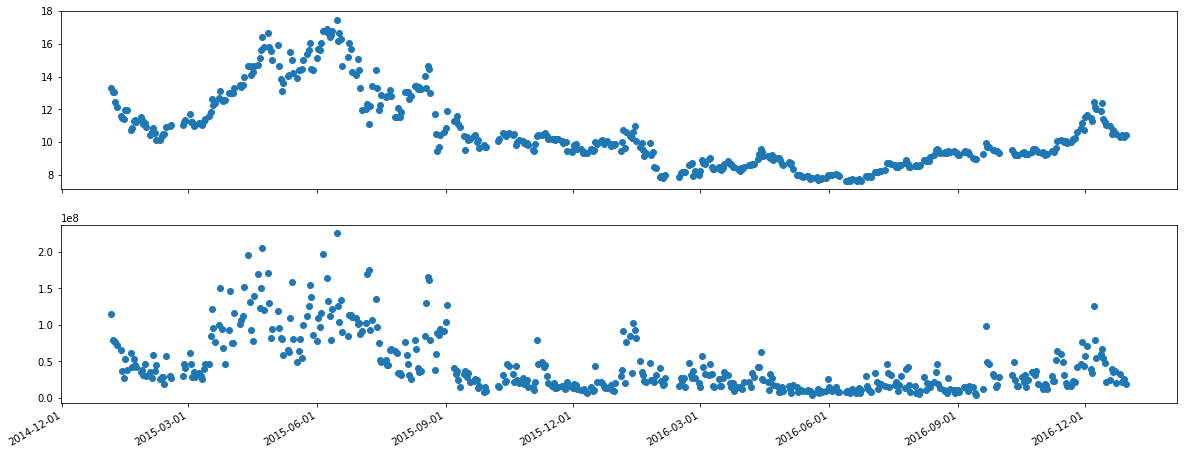

In [37]:

dates=data_df1.date.values
#print dates
# plt.figure(21)
fig=plt.figure(figsize=(20, 8))
ax1=fig.add_subplot(311)
# fig, ax = plt.subplots(figsize=(20, 8))
ax1.plot_date(dates, data_df1.close,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
           
ax2=fig.add_subplot(312)
# fig, ax = plt.subplots(212,figsize=(20, 8))
ax2.plot_date(dates, data_df1.volume,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()   
           
plt.show()



In [18]:
### get the  minimum in each groupby
# get the index of minimum in each groupby
#print data_df1
data_df2= data_df1.reset_index(drop=True)  #---- reset the index from 0
#print data_df2.groupby(['year'])['low'].min() # get the  minimum in each groupby
idx=data_df2.groupby(['year'])['low'].transform(min)==data_df2['low']  # get the index of minimum in each groupby
df3=data_df2[idx]


In [19]:


# http://matplotlib.org/examples/pylab_examples/date_demo1.html
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
import matplotlib.pyplot as plt

dates=data_df2.date.values
date1=df3.date.values
fig, ax = plt.subplots( figsize=(20, 8))
ax.plot_date(dates, data_df2.low,'.',linewidth=2)
ax.plot_date(date1, df3.low,'.',color='red',mew=10)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.show()

KeyboardInterrupt: 